In [101]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
climber_df = pd.read_csv("../data/climber_df.csv", parse_dates=['date_first','date_last'])
grades_df = pd.read_csv("../data/grades_conversion_table.csv")
routes_df = pd.read_csv("../data/routes_rated.csv")

In [103]:
climber_df.head()

,user_id,country,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
0,1,SWE,0,177,73,41.0,21,1999-02-06 23:00:00,2001-07-31 22:00:00,84,36,55,62,46.750000,1999,2001
1,3,SWE,0,180,78,44.0,22,1999-03-31 22:00:00,2000-07-19 22:00:00,12,53,51,59,52.833333,1999,2000
2,4,SWE,1,165,58,33.0,16,2004-06-30 22:00:00,2009-05-26 22:00:00,119,53,49,64,53.890756,2004,2009
3,10,SWE,0,167,63,52.0,25,2000-01-14 23:00:00,2017-06-01 22:00:00,298,53,49,63,49.406040,2000,2017
4,16,NOR,0,177,68,44.0,21,1998-02-27 23:00:00,2010-05-13 22:00:00,5,53,49,53,51.400000,1998,2010


In [104]:
grades_df.head()

,Unnamed: 0,grade_id,grade_fra
0,0,0,-
1,1,1,-
2,2,2,-
3,3,3,1
4,4,4,1a


In [105]:
routes_df.head()

,Unnamed: 0,name_id,country,crag,sector,name,tall_recommend_sum,grade_mean,cluster,rating_tot
0,0,0,and,montserrat,prohibitivo,diagonal de la x,-1,49.250000,3,-0.045211
1,1,1,and,montserrat,prohibitivo,mehir,-1,49.000000,2,0.116464
2,2,2,and,montserrat,prohibitivo,pas de la discordia,0,49.000000,2,0.178722
3,3,3,and,tartareu,bombo suis,tenedor libre,0,44.333333,3,0.158449
4,4,4,arg,bandurrias,rincon,tendinitis,1,48.500000,0,0.075797


In [106]:
climber_df.describe()

,user_id,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
count,10927.00000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927,10927,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000
mean,29411.09774,0.125103,176.152009,67.608676,33.333852,12.672188,2009-07-18 23:01:25.000457728,2012-10-29 08:25:33.961746432,79.794546,45.648851,46.983802,53.764437,45.505055,2008.621946,2012.311613
min,1.00000,0.000000,137.000000,40.000000,12.000000,1.000000,1970-01-01 00:00:00,1991-04-26 22:00:00,1.000000,28.000000,28.000000,29.000000,28.500000,0.000000,1991.000000
25%,14651.00000,0.000000,171.000000,63.000000,28.000000,8.000000,2006-11-02 23:00:00,2009-09-29 22:00:00,8.000000,38.000000,40.000000,46.000000,39.400000,2006.000000,2009.000000
50%,27323.00000,0.000000,177.000000,68.000000,33.000000,12.000000,2009-07-18 22:00:00,2013-05-05 22:00:00,28.000000,46.000000,48.000000,55.000000,45.151899,2009.000000,2013.000000
75%,43240.50000,0.000000,182.000000,73.000000,38.000000,17.000000,2012-06-29 22:00:00,2016-11-04 23:00:00,90.000000,53.000000,53.000000,62.000000,51.210084,2012.000000,2016.000000
max,67020.00000,1.000000,202.000000,93.000000,69.000000,29.000000,2017-09-09 22:00:00,2017-09-11 22:00:00,2445.000000,75.000000,77.000000,77.000000,75.272727,2017.000000,2017.000000
std,18022.12695,0.330851,8.508669,9.677316,7.590989,6.108451,NaN,NaN,141.411297,9.478173,9.418087,9.679533,7.891356,28.833298,4.161484


C:\Users\Tomca\AppData\Local\Temp\ipykernel_23400\2272744869.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=countries.head(10), x='country', y='Total', palette='viridis')


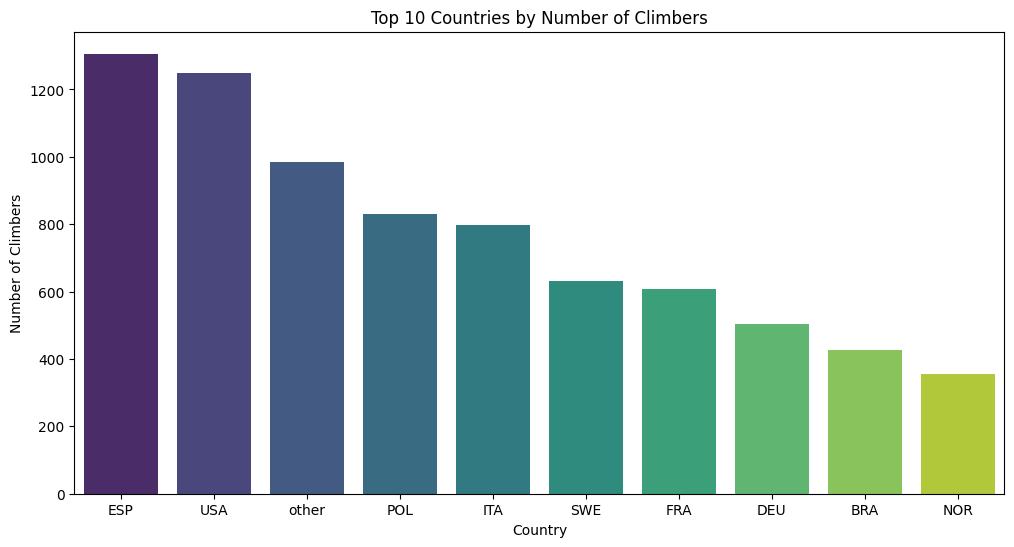

In [107]:
countries = climber_df.groupby('country').size().reset_index().rename(columns={0: 'Total'}).sort_values('Total', ascending=False)
countries.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=countries.head(10), x='country', y='Total', palette='viridis')
plt.title("Top 10 Countries by Number of Climbers")
plt.xlabel("Country")
plt.ylabel("Number of Climbers")
plt.show()

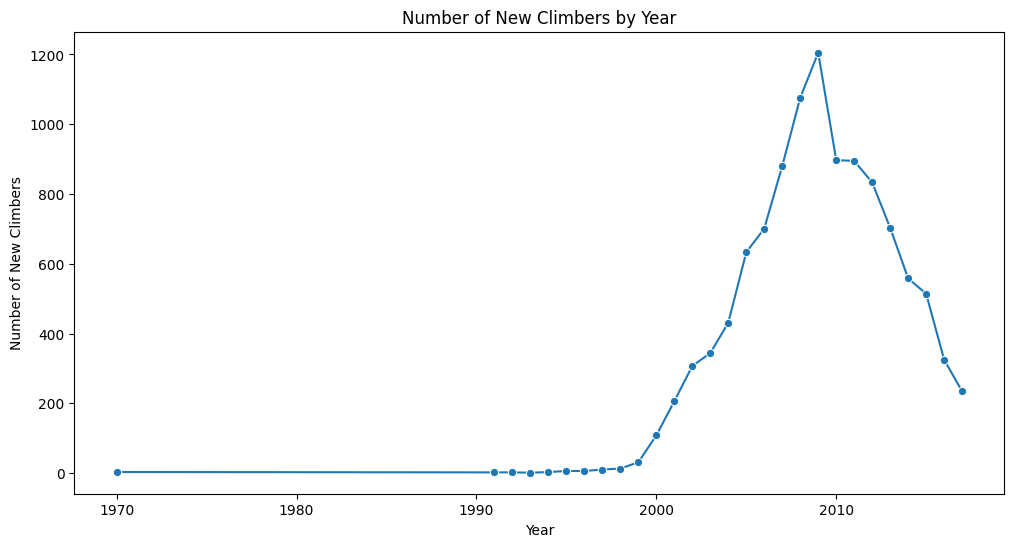

In [108]:
#répartition des grimpeurs par année de début
climber_df['year_first'] = climber_df['date_first'].dt.year
yearly_starts = climber_df.groupby('year_first').size().reset_index().rename(columns={0: 'Total'}).sort_values('year_first')
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_starts, x='year_first', y='Total', marker='o')
plt.title("Number of New Climbers by Year")
plt.xlabel("Year")
plt.ylabel("Number of New Climbers")
plt.show()

In [109]:
recent_climbers = climber_df[climber_df["years_cl"] <= 3]
recent_climbers.head()

,user_id,country,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
236,1353,AUS,1,161,53,34.0,2,2001-05-14 22:00:00,2012-07-28 22:00:00,214,66,57,72,55.939252,2001,2012
4660,23750,CAN,0,180,68,32.0,2,2008-08-28 22:00:00,2013-07-17 22:00:00,267,44,49,62,49.254682,2008,2013
7482,37936,other,0,182,68,42.0,3,2011-03-11 23:00:00,2014-04-25 22:00:00,57,53,49,62,52.701754,2011,2014
8340,44295,HRV,0,175,83,34.0,1,2017-01-26 23:00:00,2017-08-26 22:00:00,21,37,29,38,33.571429,2017,2017
9469,53343,RUS,0,168,68,26.0,3,2014-01-31 23:00:00,2017-05-13 22:00:00,51,33,42,51,41.549020,2014,2017


In [110]:
recent_climbers.describe()

,user_id,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412,412,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,61950.233010,0.223301,174.689320,66.296117,27.067961,2.349515,2016-03-14 00:33:55.922330112,2016-11-25 03:07:34.368932608,35.412621,40.087379,41.400485,46.468447,39.820620,2015.735437,2016.366505
min,1353.000000,0.000000,140.000000,40.000000,12.000000,1.000000,2001-05-14 22:00:00,2012-07-28 22:00:00,1.000000,28.000000,28.000000,30.000000,29.666667,2001.000000,2012.000000
25%,59974.500000,0.000000,169.000000,58.000000,23.000000,2.000000,2015-06-20 16:00:00,2016-05-04 10:00:00,5.000000,36.000000,36.000000,40.000000,35.571809,2015.000000,2016.000000
50%,62735.000000,0.000000,176.000000,68.000000,27.000000,3.000000,2016-05-02 10:00:00,2017-05-17 22:00:00,15.500000,38.000000,40.000000,46.000000,39.000000,2016.000000,2017.000000
75%,65221.250000,0.000000,181.000000,73.000000,31.000000,3.000000,2017-03-04 05:00:00,2017-08-12 22:00:00,37.000000,44.000000,49.000000,52.000000,43.075384,2017.000000,2017.000000
max,66988.000000,1.000000,195.000000,88.000000,62.000000,3.000000,2017-09-03 22:00:00,2017-09-11 22:00:00,522.000000,66.000000,64.000000,72.000000,57.421053,2017.000000,2017.000000
std,5047.863876,0.416965,9.227357,10.415910,6.306081,0.747534,NaN,NaN,60.143702,7.185558,7.761487,8.037714,5.898565,1.295850,0.940645


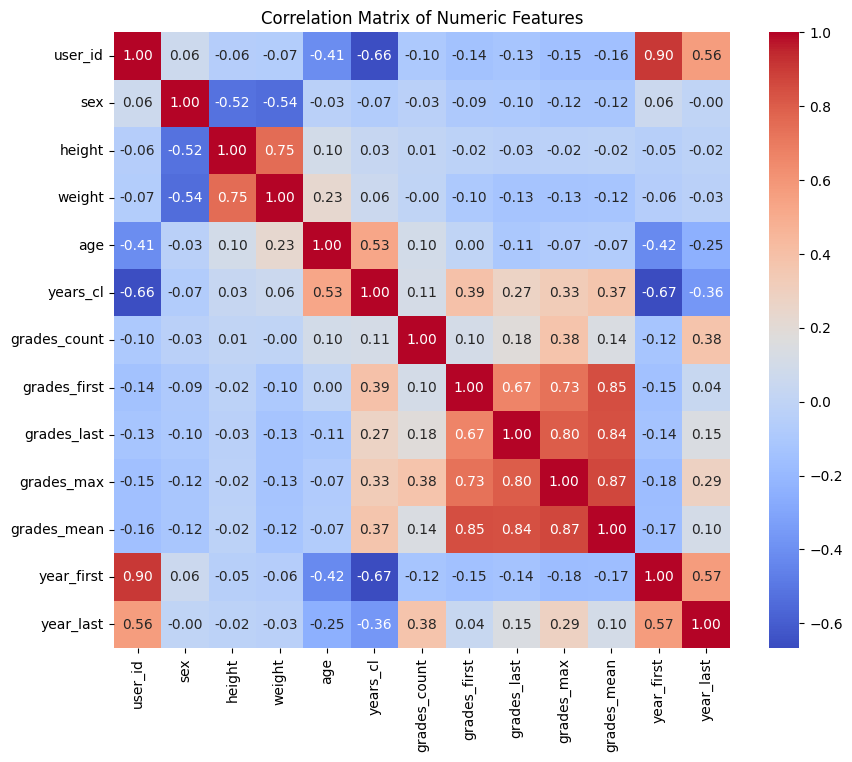

In [111]:
#correlations entre les différentes variables numériques
numeric_cols = climber_df.select_dtypes(include=[np.number]).columns
corr_matrix = climber_df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [112]:
climber_df.drop_duplicates(inplace=True)
climber_df.drop(columns=['user_id', 'year_first', 'date_first'], inplace=True)

In [113]:
climber_df = pd.get_dummies(climber_df, columns=['country'], dtype=int)
climber_df.head()

,sex,height,weight,age,years_cl,date_last,grades_count,grades_first,grades_last,grades_max,...,country_NLD,country_NOR,country_POL,country_PRT,country_RUS,country_SVN,country_SWE,country_USA,country_ZAF,country_other
0,0,177,73,41.0,21,2001-07-31 22:00:00,84,36,55,62,...,0,0,0,0,0,0,1,0,0,0
1,0,180,78,44.0,22,2000-07-19 22:00:00,12,53,51,59,...,0,0,0,0,0,0,1,0,0,0
2,1,165,58,33.0,16,2009-05-26 22:00:00,119,53,49,64,...,0,0,0,0,0,0,1,0,0,0
3,0,167,63,52.0,25,2017-06-01 22:00:00,298,53,49,63,...,0,0,0,0,0,0,1,0,0,0
4,0,177,68,44.0,21,2010-05-13 22:00:00,5,53,49,53,...,0,1,0,0,0,0,0,0,0,0


In [114]:
climber_df.to_csv("../data/cleaned_climber_df.csv", index=False)